### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, power_transform
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset using pandas

In [2]:
dataset = pd.read_csv(r'E:\Post Graduation\internship\Micro-Credit-Project\Data file.csv')
dataset.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


### Dropping the columns Unnamed and msisdn because Unnamed is an index type of variable and msisdn is assigned to subscribers randomly and will not be useful for the prediction

In [3]:
dataset = dataset.drop(columns = ['Unnamed: 0','msisdn'])

In [4]:
dataset.shape

(209593, 35)

### This Sample dataset contains 2095393 rows and 35 columns and there are no null values in the dataset

In [5]:
dataset.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

### Checking for the data types

In [6]:
pd. set_option("display.max_rows", None)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

### Most of the columns are of numeric data type except pcircle and pdate

In [7]:
dataset.describe().iloc[:,:15]

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000


### For the above features, we can see that the standard deviation is way more than the mean values, this implies the presence of outliers/ un-real data

In [8]:
dataset.describe().iloc[:,15:]

,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


### As per the observation on the previous variables, the standard deviation for all the numeric columns are more than the standard deviation as observed for previous variables

### Let's encode  the categorical variables and extract features from the date variable

In [9]:
dataset['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

### We can drop the pcircle variable as there is only one category for the entire dataset and will not have any effect on the target variable

In [10]:
dataset = dataset.drop(columns = 'pcircle')

### extracting features from date

In [11]:
dataset['pdate'] = pd.to_datetime(dataset['pdate'], errors = 'coerce',format='%Y-%m-%d')
dataset['month'] = dataset['pdate'].dt.month
dataset['year'] = dataset['pdate'].dt.year
dataset['day'] = dataset['pdate'].dt.day

### now we can drop the pdate

In [12]:
dataset = dataset.drop(columns = 'pdate')

In [13]:
dataset.shape

(209593, 36)

### Checking for correlation between the dependent and independent variables

In [14]:
data_corr = dataset.corr()
data_corr['label'].sort_values(ascending = False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
month                   0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
day                     0.006825
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_lo

### Visualizing some of the highly correlated variables using stripplot and histogram

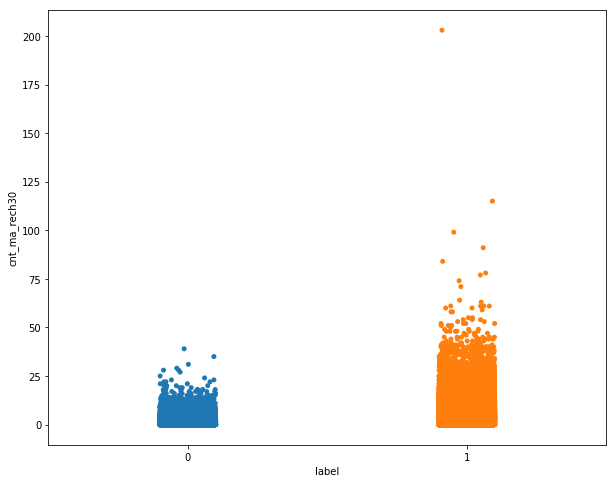

In [72]:
plt.figure(figsize = (10,8))
sns.stripplot(x = 'label',y ='cnt_ma_rech30', data = dataset)

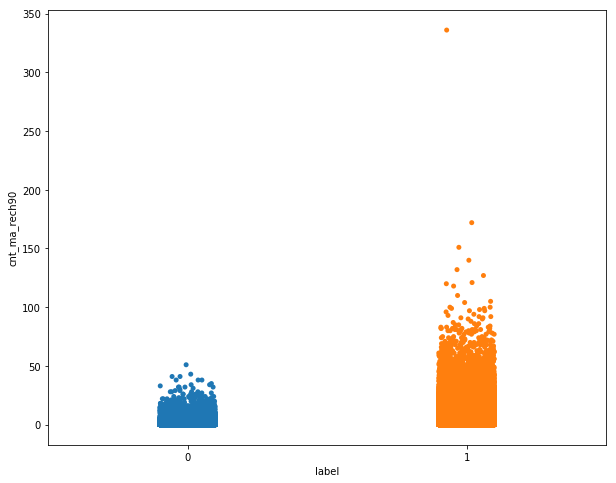

In [73]:
plt.figure(figsize = (10,8))
sns.stripplot(x = 'label',y ='cnt_ma_rech90', data = dataset)

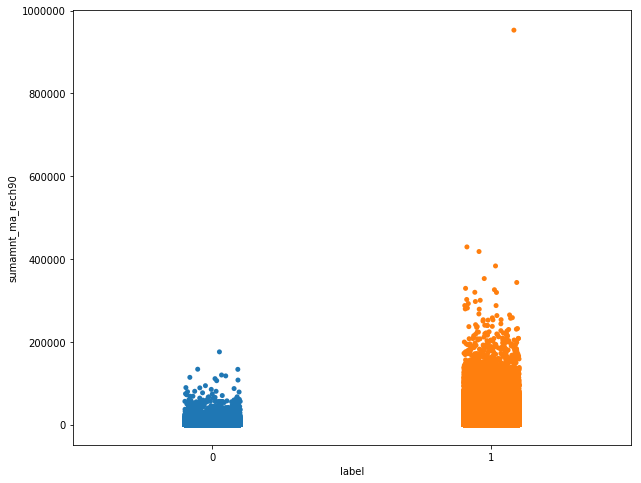

In [74]:
plt.figure(figsize = (10,8))
sns.stripplot(x = 'label',y ='sumamnt_ma_rech90', data = dataset)

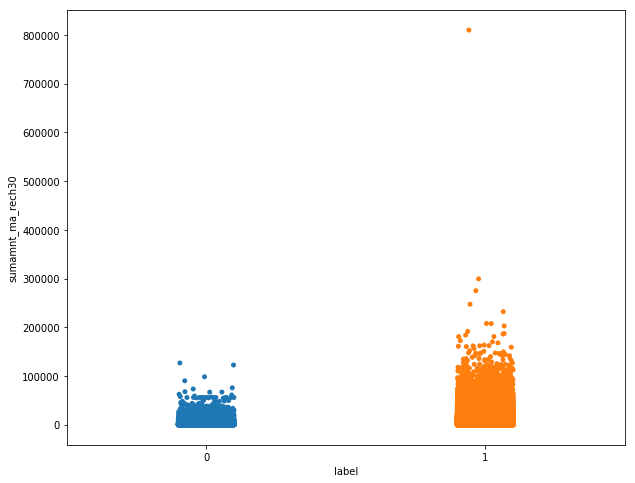

In [75]:
plt.figure(figsize = (10,8))
sns.stripplot(x = 'label',y ='sumamnt_ma_rech30', data = dataset)

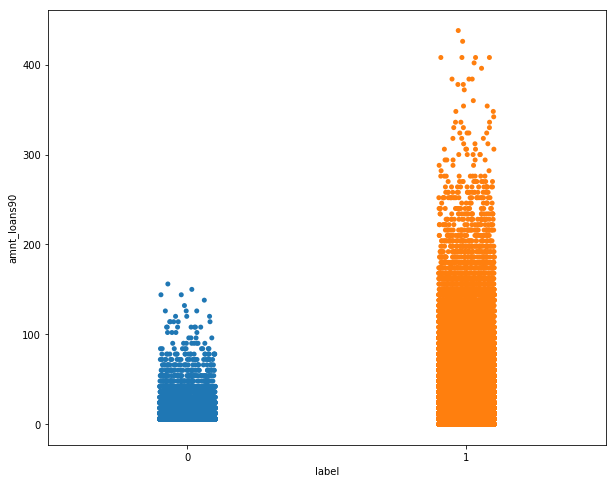

In [76]:
plt.figure(figsize = (10,8))
sns.stripplot(x = 'label',y ='amnt_loans90', data = dataset)

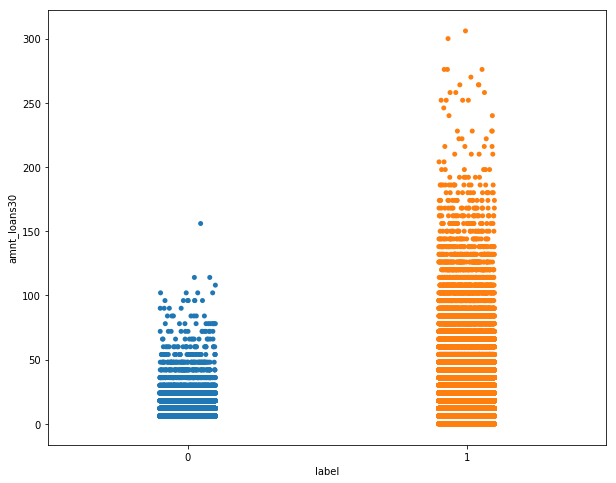

In [77]:
plt.figure(figsize = (10,8))
sns.stripplot(x = 'label',y ='amnt_loans30', data = dataset)

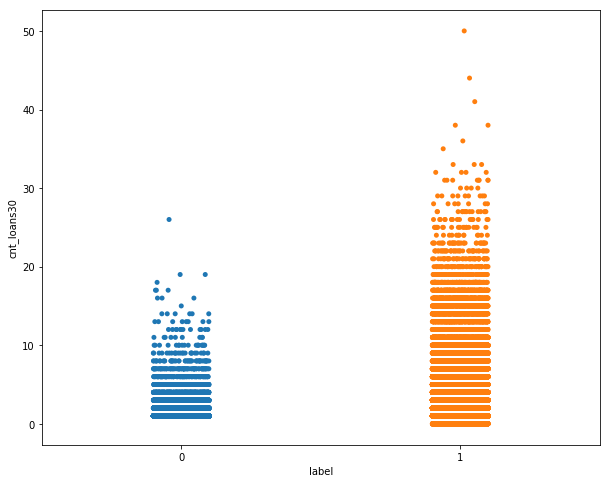

In [78]:
plt.figure(figsize = (10,8))
sns.stripplot(x = 'label',y ='cnt_loans30', data = dataset)

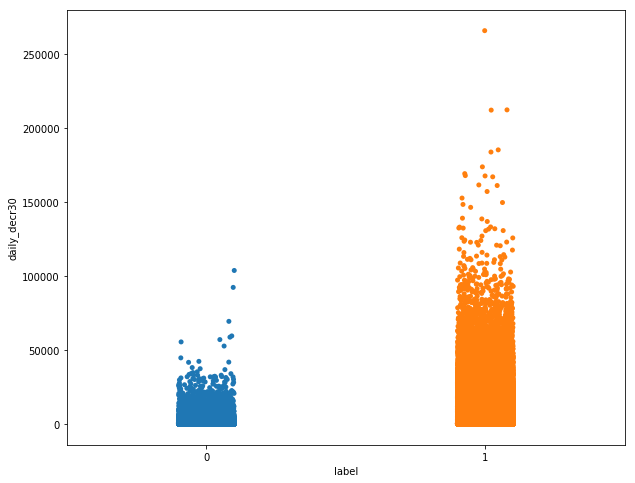

In [79]:
plt.figure(figsize = (10,8))
sns.stripplot(x = 'label',y ='daily_decr30', data = dataset)

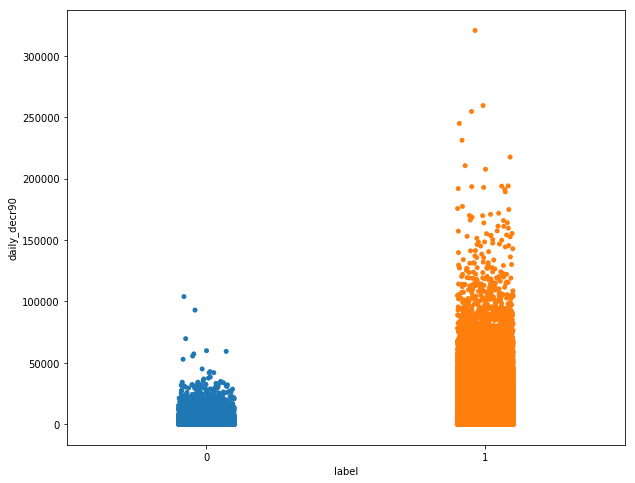

In [80]:
plt.figure(figsize = (10,8))
sns.stripplot(x = 'label',y ='daily_decr90', data = dataset)

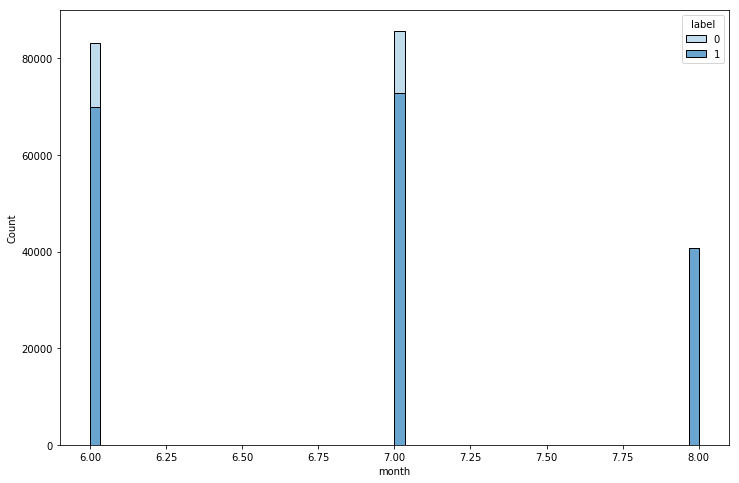

In [82]:
plt.figure(figsize = (12,8))
sns.histplot(x = 'month', hue = 'label', multiple = 'stack', palette = 'Blues', data = dataset)

### The data is from the same year hence I'm dropping year too

In [15]:
dataset = dataset.drop(columns = 'year')

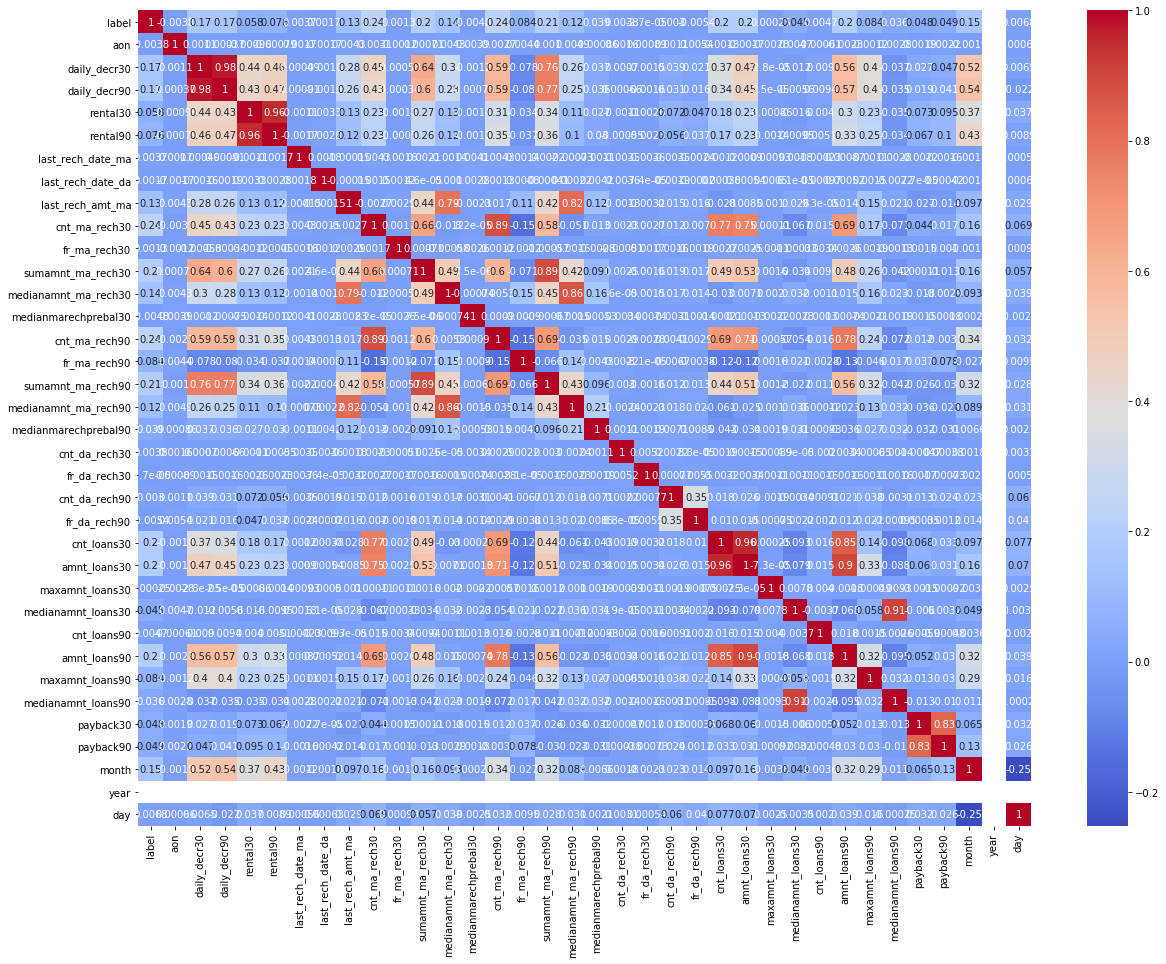

In [16]:
plt.figure(figsize = (20,15))
sns.heatmap(data_corr, annot = True,cmap = 'coolwarm')

### few of the columns are correlated with each other daily_decr30 and daily_decr90, rental30 and rental90, cnt_loans30 and amnt_loans30, medianamnt_loans90 and medianamnt_loans30 and expecting there can be multi-collinearity issues with the variables

### Visualizing the relationship between the independent variables with more than 0.8 correlation coefficient

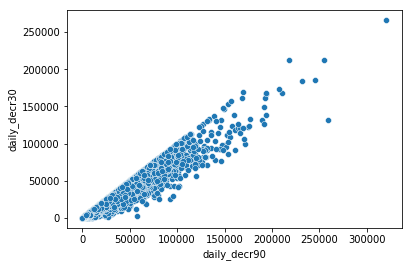

In [17]:
sns.scatterplot(x = 'daily_decr90',y = 'daily_decr30', data = dataset)

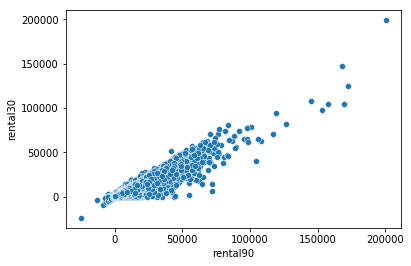

In [18]:
sns.scatterplot(x = 'rental90',y = 'rental30', data = dataset)

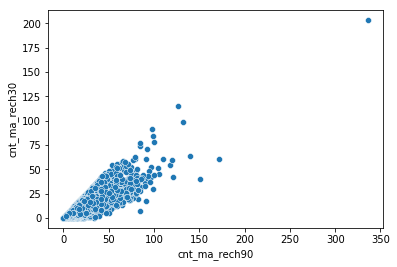

In [19]:
sns.scatterplot(x = 'cnt_ma_rech90',y = 'cnt_ma_rech30', data = dataset)

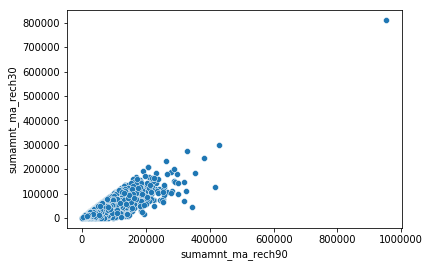

In [20]:
sns.scatterplot(x = 'sumamnt_ma_rech90',y = 'sumamnt_ma_rech30', data = dataset)

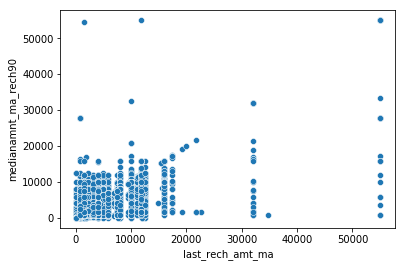

In [21]:
sns.scatterplot(x = 'last_rech_amt_ma',y = 'medianamnt_ma_rech90', data = dataset)

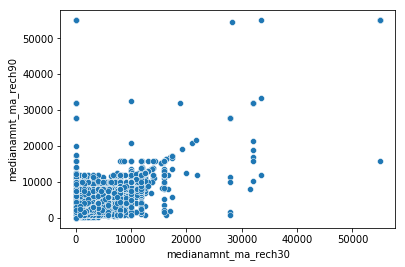

In [22]:
sns.scatterplot(x = 'medianamnt_ma_rech30',y = 'medianamnt_ma_rech90', data = dataset)

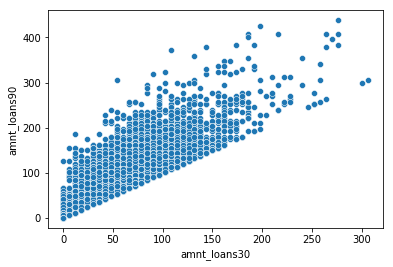

In [23]:
sns.scatterplot(x = 'amnt_loans30',y = 'amnt_loans90', data = dataset)

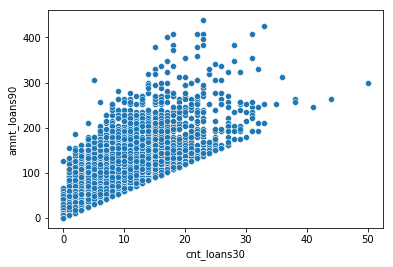

In [24]:
sns.scatterplot(x = 'cnt_loans30',y = 'amnt_loans90', data = dataset)

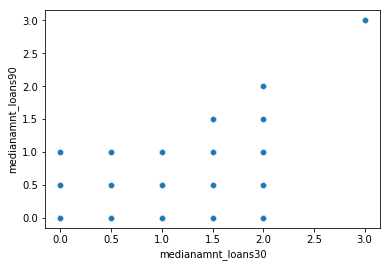

In [25]:
sns.scatterplot(x = 'medianamnt_loans30',y = 'medianamnt_loans90', data = dataset)

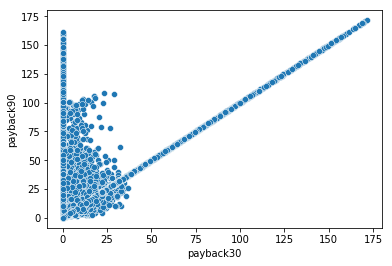

In [26]:
sns.scatterplot(x = 'payback30',y = 'payback90', data = dataset)

### Checking for outliers using boxplot

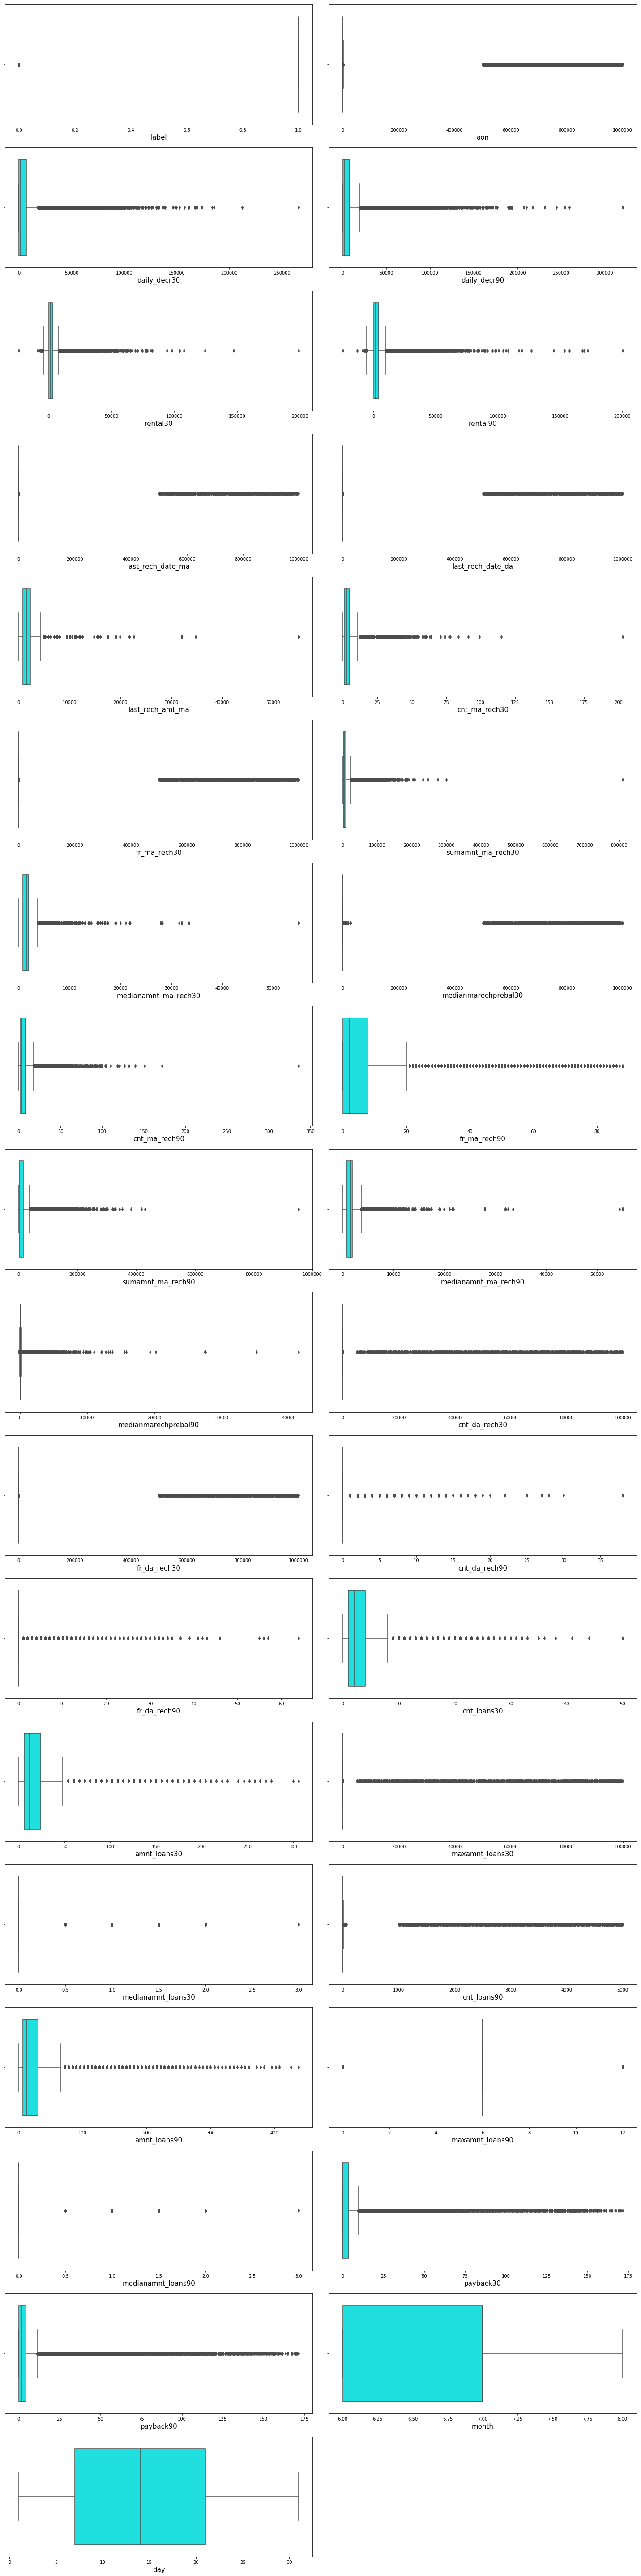

In [27]:
plt.figure(figsize = (20,80))
pltnum = 1
for i in dataset:
    if pltnum<=36:
        plt.subplot(18,2,pltnum)
        sns.boxplot(dataset[i], color = 'cyan', orient = 'h')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

### We can clearly see that most of the continuos data columns has a lot of outliers

In [28]:
z = np.abs(zscore(dataset[['aon','daily_decr90','rental90','last_rech_date_ma','cnt_ma_rech30','cnt_da_rech30','last_rech_date_ma']]))
z.head()

,aon,daily_decr90,rental90,last_rech_date_ma,cnt_ma_rech30,cnt_da_rech30,last_rech_date_ma
0,0.103577,0.276346,0.558583,0.069637,0.464760,0.062759,0.069637
1,0.097764,0.553380,0.036020,0.069303,0.699718,0.062759,0.069303
2,0.100102,0.429033,0.447674,0.069619,0.699718,0.062759,0.069619
3,0.103986,0.555125,0.576036,0.068914,0.934677,0.062759,0.068914
4,0.094660,0.543274,0.413227,0.069600,0.710030,0.062759,0.069600


In [29]:
new_data = dataset[(z<2.8).all(axis = 1)]
print(new_data.shape)
print(dataset.shape)

(192794, 35)
(209593, 35)


### There is a 8% data loss, hence removing the outliers

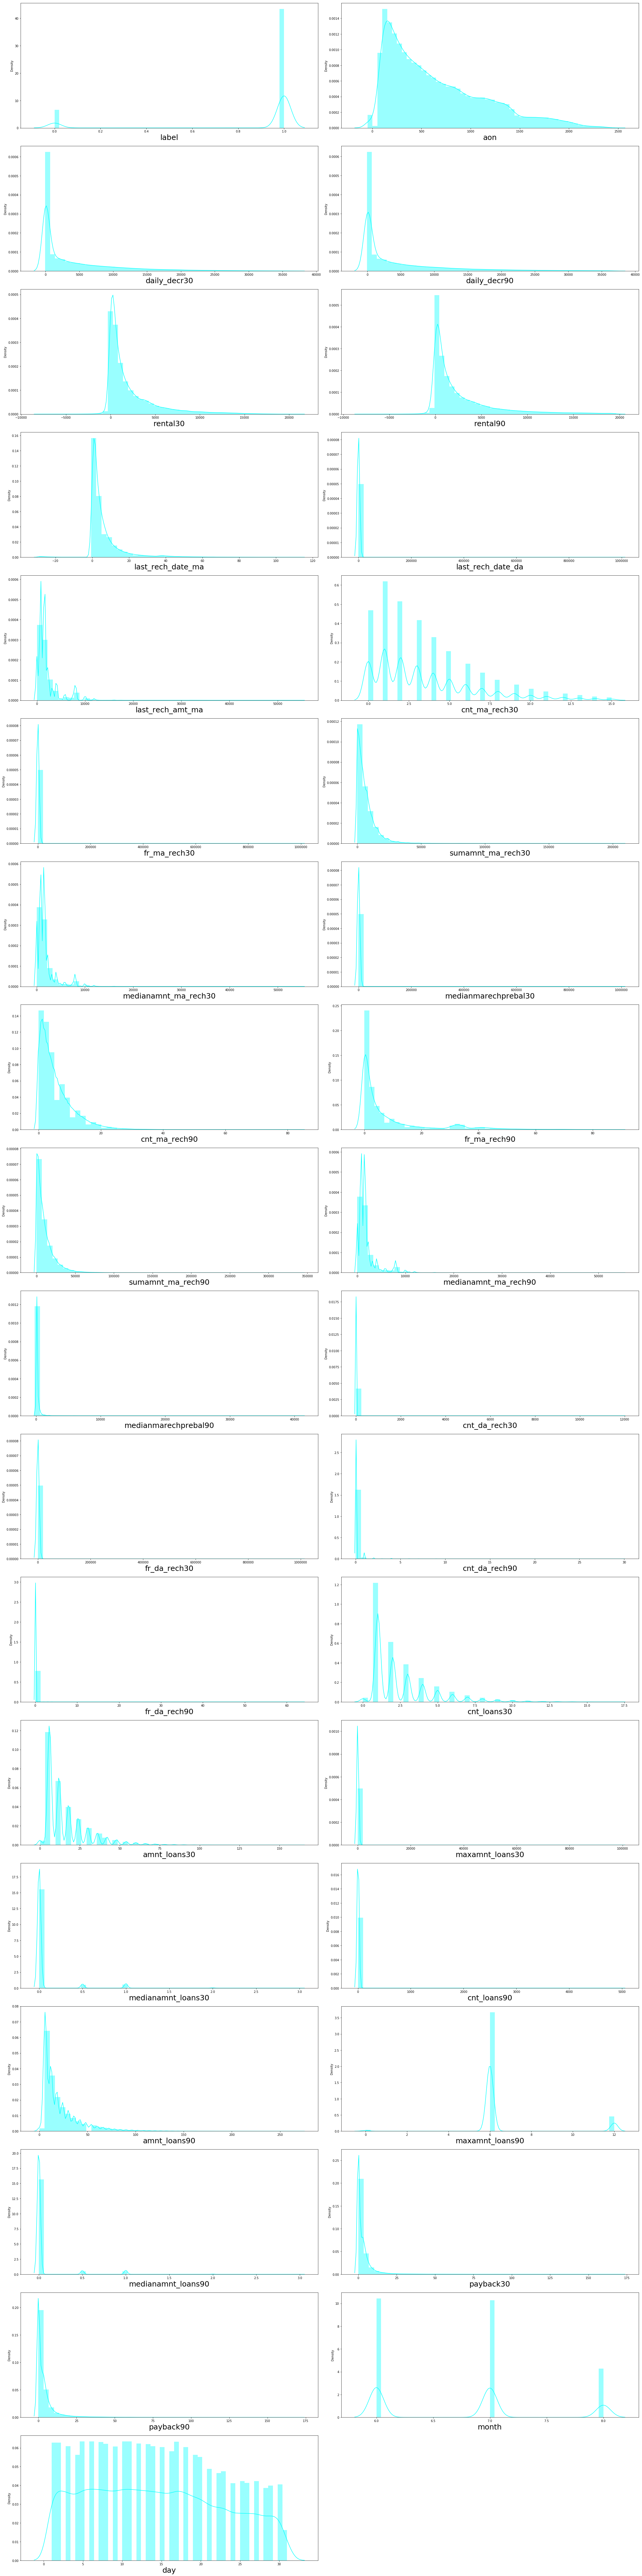

In [85]:
plt.figure(figsize = (30,120))
pltnum = 1
for i in new_data:
    if pltnum<=36:
        plt.subplot(18,2,pltnum)
        sns.distplot(new_data[i], color = 'cyan')
        plt.xlabel(i, fontsize = 25)
    pltnum+=1
plt.tight_layout()

### I can see that most of the continous data columns are skewed. Checking for skewness coefficient

In [31]:
new_data.skew()

label                   -2.183891
aon                      0.945558
daily_decr30             1.971144
daily_decr90             2.000623
rental30                 2.200720
rental90                 2.118841
last_rech_date_ma        3.036533
last_rech_date_da       14.771100
last_rech_amt_ma         3.186359
cnt_ma_rech30            1.222543
fr_ma_rech30            14.726795
sumamnt_ma_rech30        3.168908
medianamnt_ma_rech30     3.130302
medianmarechprebal30    14.847538
cnt_ma_rech90            1.751959
fr_ma_rech90             2.215620
sumamnt_ma_rech90        2.636287
medianamnt_ma_rech90     3.392253
medianmarechprebal90    46.596659
cnt_da_rech30           54.081252
fr_da_rech30            14.693527
cnt_da_rech90           24.793890
fr_da_rech90            29.662829
cnt_loans30              1.819690
amnt_loans30             1.952425
maxamnt_loans30         17.786668
medianamnt_loans30       4.500744
cnt_loans90             16.588551
amnt_loans90             2.354312
maxamnt_loans9

In [32]:
x = new_data.drop(columns = 'label')
y = new_data['label']

In [33]:
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
scd = scal.fit_transform(x)
x = pd.DataFrame(scd, columns = x.columns)

In [34]:
tr_data = power_transform(x, method = 'yeo-johnson')
x = pd.DataFrame(tr_data, columns = x.columns)

In [35]:
x.skew()

aon                      0.138912
daily_decr30             0.541138
daily_decr90             0.565902
rental30                -0.237343
rental90                 0.078962
last_rech_date_ma       -0.750206
last_rech_date_da       13.966419
last_rech_amt_ma         0.277605
cnt_ma_rech30            0.135011
fr_ma_rech30            13.989947
sumamnt_ma_rech30        0.278974
medianamnt_ma_rech30     0.208261
medianmarechprebal30     9.073898
cnt_ma_rech90            0.227047
fr_ma_rech90             0.654211
sumamnt_ma_rech90        0.319295
medianamnt_ma_rech90     0.215753
medianmarechprebal90    -0.164769
cnt_da_rech30           15.669250
fr_da_rech30            13.969584
cnt_da_rech90            5.983559
fr_da_rech90            15.896629
cnt_loans30              0.271020
amnt_loans30             0.286531
maxamnt_loans30         13.677166
medianamnt_loans30       3.417175
cnt_loans90              3.608867
amnt_loans90             0.391468
maxamnt_loans90         -0.349961
medianamnt_loa

In [36]:
x = np.cbrt(x)

In [37]:
x.skew()

aon                      0.068897
daily_decr30             0.321136
daily_decr90             0.342516
rental30                 0.370647
rental90                 0.331566
last_rech_date_ma        0.641854
last_rech_date_da        9.414281
last_rech_amt_ma        -0.158959
cnt_ma_rech30           -0.013846
fr_ma_rech30             8.649814
sumamnt_ma_rech30        0.132940
medianamnt_ma_rech30    -0.062924
medianmarechprebal30     1.826726
cnt_ma_rech90            0.158388
fr_ma_rech90             0.372789
sumamnt_ma_rech90        0.138575
medianamnt_ma_rech90    -0.078383
medianmarechprebal90     0.544309
cnt_da_rech30            8.242077
fr_da_rech30            13.905260
cnt_da_rech90            5.983559
fr_da_rech90            15.896629
cnt_loans30             -0.025962
amnt_loans30             0.337138
maxamnt_loans30          3.134176
medianamnt_loans30       3.417175
cnt_loans90              0.832249
amnt_loans90             0.218679
maxamnt_loans90          2.288051
medianamnt_loa

### Checking for distribution post outlier removal and skewness control

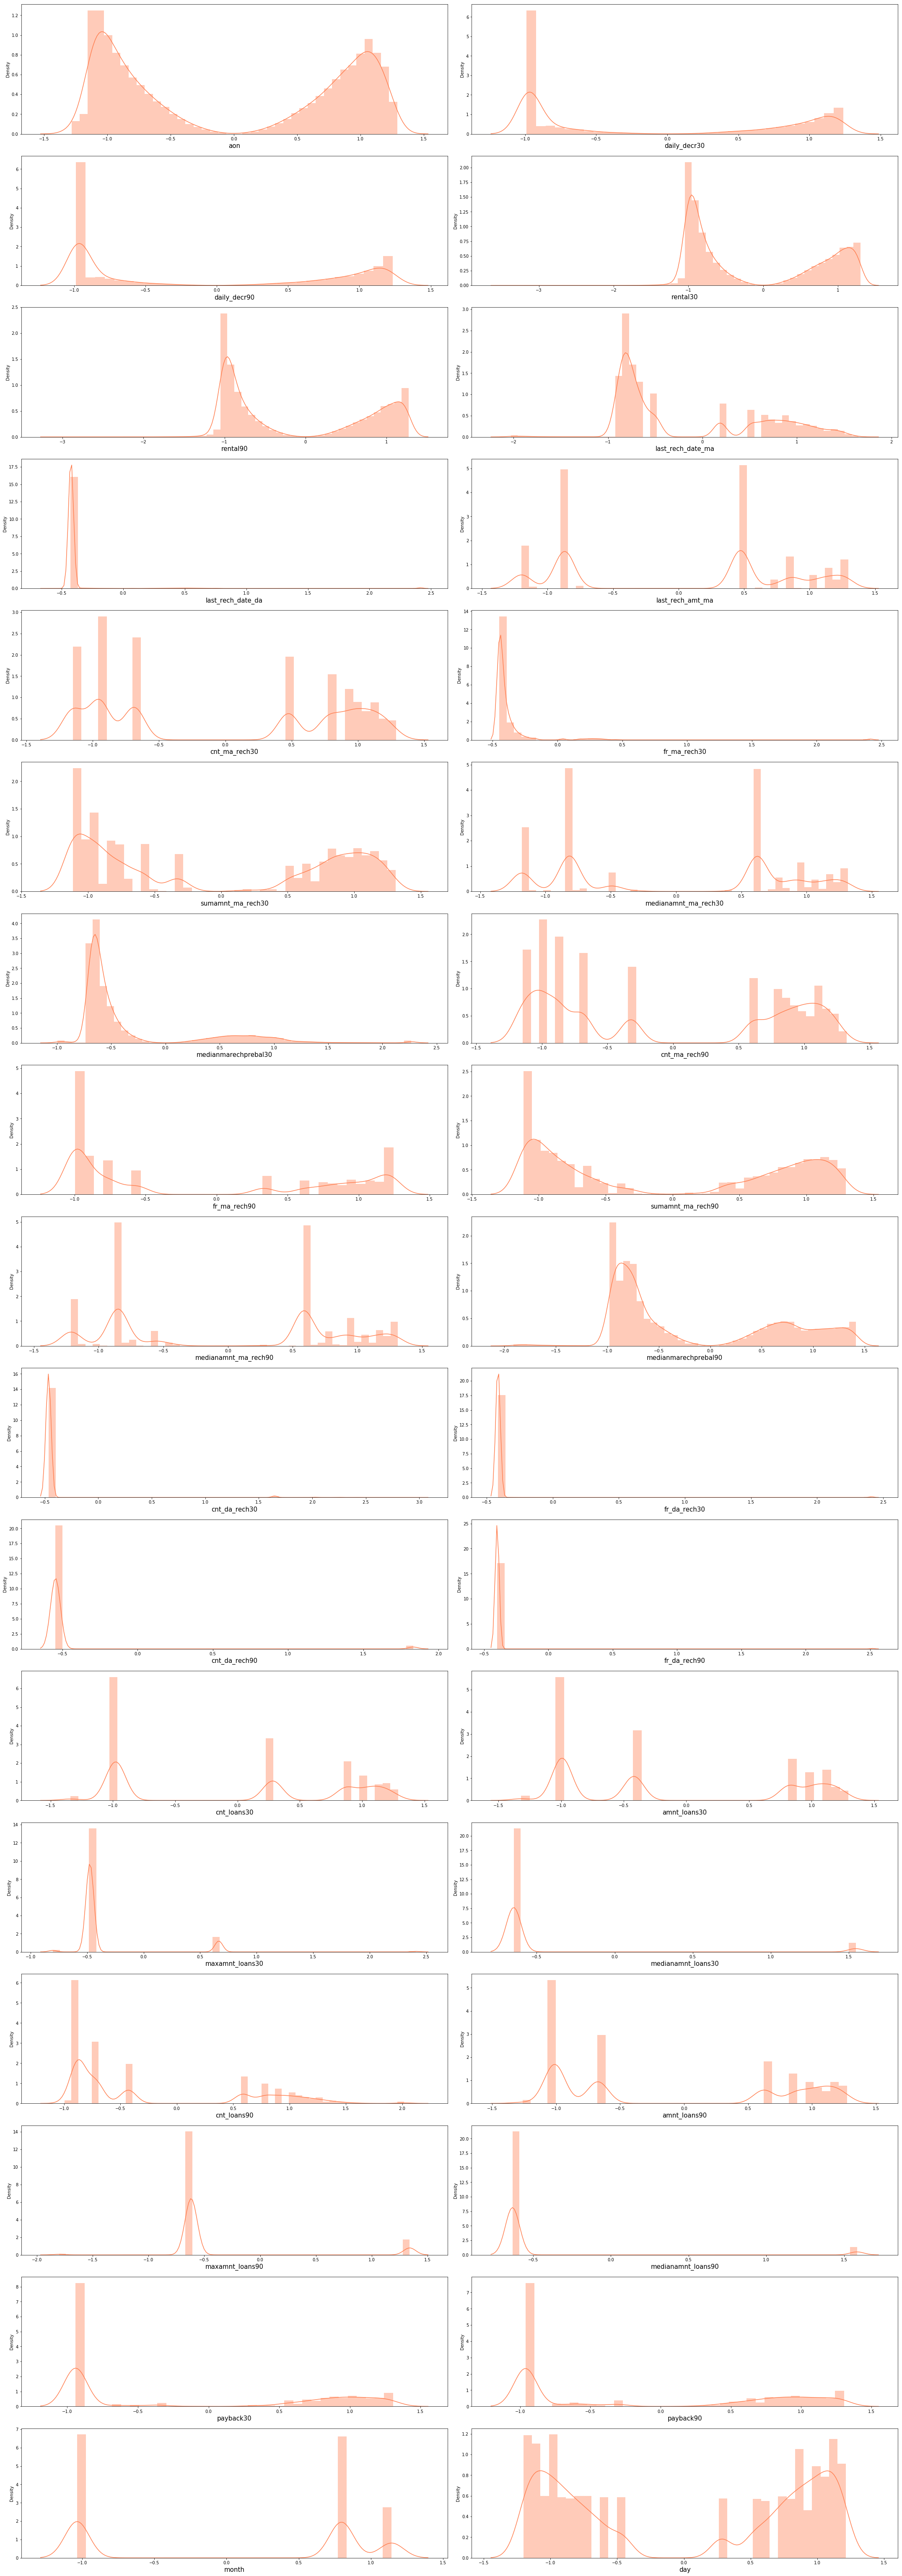

In [38]:
plt.figure(figsize = (30,90))
pltnum = 1
for i in x:
    if pltnum<=36:
        plt.subplot(18,2,pltnum)
        sns.distplot(x[i], color = 'coral')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

### Checking for the outliers again

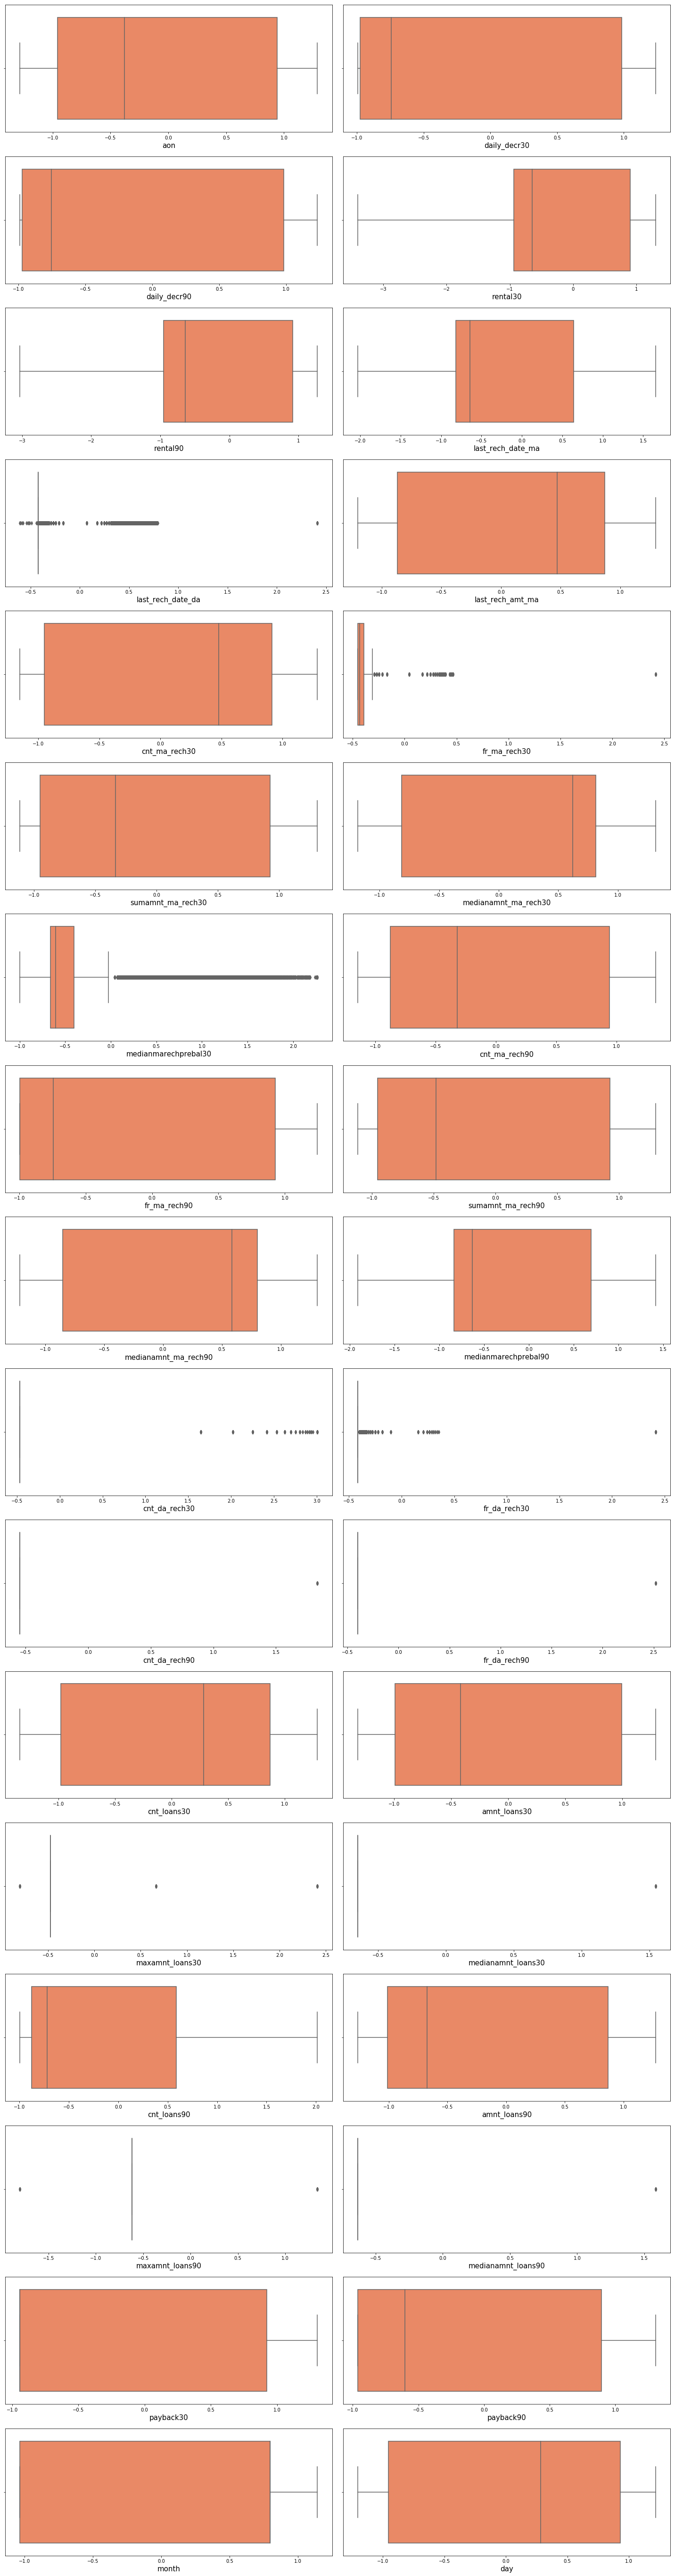

In [39]:
plt.figure(figsize = (20,80))
pltnum = 1
for i in x:
    if pltnum<=36:
        plt.subplot(18,2,pltnum)
        sns.boxplot(x[i], color = 'coral', orient = 'h')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

### We got the skewness under control for most of the variables. However, there are certain variables for which we couldn't get the skewness down. This might be the presence of outliers

In [40]:
print("""
Below are the features with high skewness
last_rech_date_da = -9.41 - continuous
fr_ma_rech30 = 8.64 - continuous
medianmarechprebal30 = 1.82 - continuous
cnt_da_rech30 = 8.242077 - continuous
fr_da_rech30 = 13.905260 - continuous
cnt_da_rech90 = 5.983559 - continuous
fr_da_rech90 = 15.896629 -  continuous
maxamnt_loans30 = 3.134176 - continuous
medianamnt_loans30 = 3.417175 - categorical
maxamnt_loans90 = 2.288051 - continuous
medianamnt_loans90 = 3.712997 - categorical
""")


Below are the features with high skewness
last_rech_date_da = -9.41 - continuous
fr_ma_rech30 = 8.64 - continuous
medianmarechprebal30 = 1.82 - continuous
cnt_da_rech30 = 8.242077 - continuous
fr_da_rech30 = 13.905260 - continuous
cnt_da_rech90 = 5.983559 - continuous
fr_da_rech90 = 15.896629 -  continuous
maxamnt_loans30 = 3.134176 - continuous
medianamnt_loans30 = 3.417175 - categorical
maxamnt_loans90 = 2.288051 - continuous
medianamnt_loans90 = 3.712997 - categorical



### before coming to any conclusion, I'm building the model with all the data and taking a call to remove the variables with respect to correlation, multi-collinearity and skewness, if the model doesn't perform well

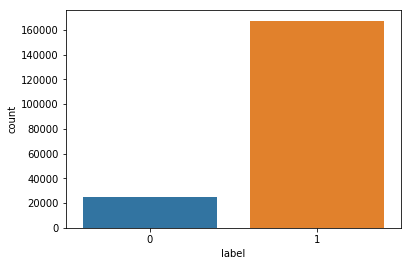

In [41]:
sns.countplot(y)

### There is a class imbalance, Therefore using the SMOTE oversampling to address the same

In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_over, y_over = sm.fit_resample(x,y)

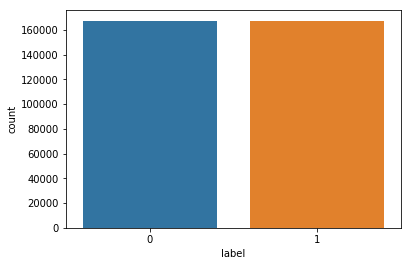

In [43]:
sns.countplot(y_over)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
rs = 0
for i in range(0,2000):
    x_train,x_test, y_train,y_test = train_test_split(x_over,y_over,test_size = 0.33, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    ts_pred = lg.predict(x_test)
    tr_pred = lg.predict(x_train)
    ts_score = accuracy_score(y_test,ts_pred)
    tr_score = accuracy_score(y_train, tr_pred)
    if round(ts_score*100,1) == round(tr_score*100,1):
        if i>rs:
            rs = i
print('the best random state for the data set is', rs)

the best random state for the data set is 1999


In [45]:
x_train, x_test, y_train,y_test = train_test_split(x_over,y_over, test_size = 0.33, random_state = rs)

In [46]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg_pred = lg.predict(x_test)
lg_score = accuracy_score(y_test,lg_pred)
lg_score

0.7715167085813537

In [47]:
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     55410
           1       0.79      0.74      0.76     55132

    accuracy                           0.77    110542
   macro avg       0.77      0.77      0.77    110542
weighted avg       0.77      0.77      0.77    110542



In [48]:
print(roc_auc_score(y_test, lg_pred))

0.7714443043705657


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_score = accuracy_score(y_test,rf_pred)
rf_score

0.9494762171844185

In [50]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     55410
           1       0.95      0.95      0.95     55132

    accuracy                           0.95    110542
   macro avg       0.95      0.95      0.95    110542
weighted avg       0.95      0.95      0.95    110542



In [51]:
print(roc_auc_score(y_test, rf_pred))

0.9494705967478514


In [52]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = accuracy_score(y_test,et_pred)
et_score

0.9565142660708147

In [53]:
print(classification_report(y_test, et_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     55410
           1       0.97      0.94      0.96     55132

    accuracy                           0.96    110542
   macro avg       0.96      0.96      0.96    110542
weighted avg       0.96      0.96      0.96    110542



In [54]:
print(roc_auc_score(y_test, et_pred))

0.9564793873712457


In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_score = accuracy_score(y_test,xgb_pred)
xgb_score

0.9457762660346294

In [56]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     55410
           1       0.94      0.96      0.95     55132

    accuracy                           0.95    110542
   macro avg       0.95      0.95      0.95    110542
weighted avg       0.95      0.95      0.95    110542



In [57]:
print(roc_auc_score(y_test,xgb_pred))

0.9458015857674219


In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_score = accuracy_score(y_test, knn_pred)
knn_score

0.8673173997213729

In [59]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     55410
           1       0.96      0.76      0.85     55132

    accuracy                           0.87    110542
   macro avg       0.88      0.87      0.87    110542
weighted avg       0.88      0.87      0.87    110542



In [60]:
print(roc_auc_score(y_test, knn_pred))

0.8670539048394729


### Checking for cross val score on all models to see whether the model is over fittingm

In [61]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lg, x_over,y_over,cv = 5)
cv = cv.mean()
cv

0.7711016400480433

In [62]:
cv1 = cross_val_score(rf, x_over,y_over,cv = 5)
cv1 = cv1.mean()
cv1

0.946491430160233

In [63]:
cv2 = cross_val_score(et, x_over,y_over,cv = 5)
cv2 = cv2.mean()
cv2

0.962582183424308

In [64]:
cv3 = cross_val_score(xgb, x_over,y_over,cv = 5)
cv3 = cv3.mean()
cv3

0.9323590454991673

In [65]:
cv4 = cross_val_score(knn, x_over,y_over,cv = 5)
cv4 = cv4.mean()
cv4

0.876796409278179

### Model Selection 

In [66]:
model =[lg_score, rf_score, et_score,xgb_score,knn_score]
cross_val = [cv,cv1,cv2,cv3,cv4]
selection = pd.DataFrame({})
selection['model'] = model
selection['cross_val'] = cross_val
selection['difference'] = selection['model'] - selection['cross_val']
selection

,model,cross_val,difference
0,0.771517,0.771102,0.000415
1,0.949476,0.946491,0.002985
2,0.956514,0.962582,-0.006068
3,0.945776,0.932359,0.013417
4,0.867317,0.876796,-0.009479


### Exra Trees is the best model for the dataset because, the score is reaching up to 0.96

### Hyper parameter tuning

In [103]:
params ={'n_estimators':[100,200,300,400],
        'criterion':['gini','entropy'],
        'max_depth':[23,25,29,31],
        'min_samples_split':[2,3,4,5],
        'bootstrap':[True,False]}

In [104]:
final = GridSearchCV(ExtraTreesClassifier(),params,cv=5, n_jobs =-1)
final.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [13, 15, 16, 17],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400]})

In [105]:
final.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 17,
 'min_samples_split': 2,
 'n_estimators': 300}

In [67]:
final_rf = ExtraTreesClassifier(bootstrap = False, criterion= 'gini', max_depth = 32, min_samples_split = 3, n_estimators =600)
final_rf.fit(x_train,y_train)
final_pred = final_rf.predict(x_test)
final_score = accuracy_score(y_test,final_pred)
final_score

0.9414792567530893

### Hyper paramter tuning is not improving the score. hence we can proceed with the basic Extra Trees model

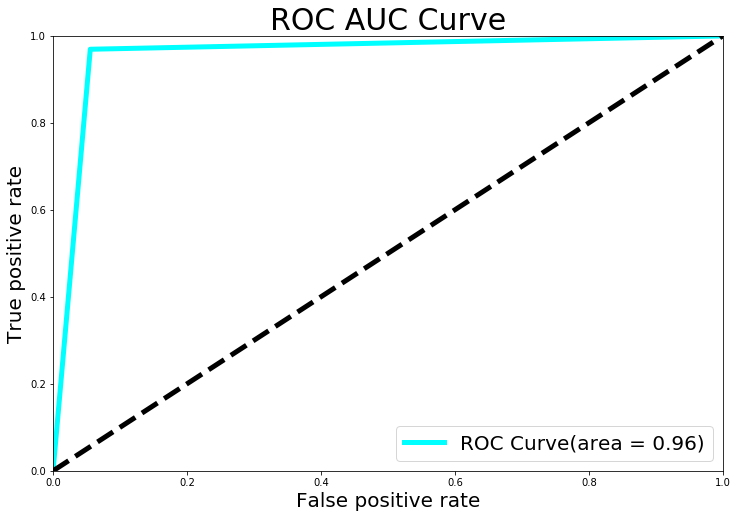

In [68]:
from sklearn.metrics import roc_curve, auc
fpr,tpr, thresholds  = roc_curve(et_pred, y_test)
roc_auc = auc(fpr,tpr)

plt.figure(figsize = (12,8))
plt.plot(fpr, tpr, lw=5, color = 'cyan',label = 'ROC Curve(area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],lw =5, color ='black', linestyle = '--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('False positive rate', fontsize = 20)
plt.ylabel('True positive rate', fontsize  =20)
plt.title('ROC AUC Curve', fontsize = 30)
plt.legend(loc ='lower right', fontsize = 20)
plt.show()

In [70]:
import joblib
joblib.dump(et,'micro_credit.pkl')

['micro_credit.pkl']